In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [52]:
g = nx.Graph()
g.add_node('apple')
g.add_nodes_from(['banana', 'kiwi', 'mango'])
g.nodes()

NodeView(('apple', 'banana', 'kiwi', 'mango'))

In [53]:
g.add_edge('apple', 'banana')
g.add_edges_from([('apple','mango'),('apple','kiwi')])
g.edges(data=True)

EdgeDataView([('apple', 'banana', {}), ('apple', 'mango', {}), ('apple', 'kiwi', {})])

In [54]:
g.nodes['kiwi']['kind'] = 'fruit'
g.nodes['kiwi']
g.nodes['apple']['kind'] = 'Kor_fruit'
g.nodes(data=True)

NodeDataView({'apple': {'kind': 'Kor_fruit'}, 'banana': {}, 'kiwi': {'kind': 'fruit'}, 'mango': {}})

In [96]:
g.add_edge('apple', 'mango', weight=2.5)
g['apple']['kiwi']['weight'] = 5
g.edges(data=True)

EdgeDataView([('apple', 'banana', {}), ('apple', 'mango', {'weight': 2.5}), ('apple', 'kiwi', {'weight': 5})])

In [97]:
g.edges(data=True)
nx.degree(g)
matrix = nx.to_numpy_matrix(g)

g.edges.data('weight')
weight_list = []
for a in g.edges.data('weight'):
    if a[2] is None:
        weight_list.append(1)
    else:
        weight_list.append(a[2])
weight_list

[1, 2.5, 5]

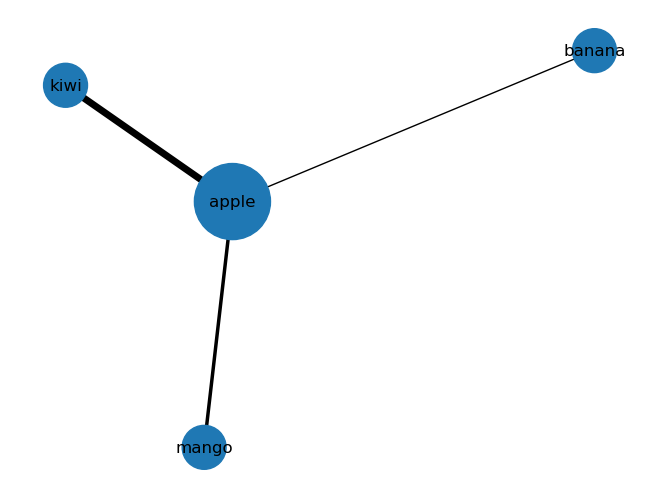

In [98]:
nx.to_numpy_matrix(g)
degree = g.degree()
nx.draw(g, node_size=[v*1000 for v in [v for k, v in degree]],
width= [a for a in weight_list], 
with_labels=True)
plt.show()

In [3]:
df_job_major = pd.read_csv('/home/seongyeub/2022/KT_Project/KT_Edu/job_map/data_analysis/new_job_data.csv')
df_job_major_without_null = df_job_major.dropna()
job_major = df_job_major_without_null[['job', 'major']]
job_major


,job,major
3,가상현실전문가,컴퓨터공학과
4,가상현실전문가,컴퓨터과학과
5,가상현실전문가,컴퓨터디자인학과
6,가상현실전문가,컴퓨터소프트웨어과
7,가상현실전문가,컴퓨터응용기계과
...,...,...
1696,IT컨설턴트,경영학과
1697,IT컨설턴트,스마트정보과
1698,IT컨설턴트,인터넷정보학과
1699,IT컨설턴트,정보통신공학과


In [31]:
pd.set_option('display.width', 5000)

In [4]:
df_subjects = pd.read_csv('/home/seongyeub/2022/KT_Project/KT_Edu/job_map/data_analysis/new_major_subject.csv')
df_subjects 
job_major_subject_df = pd.merge(job_major, df_subjects)
job_major_subject_df.to_csv('/home/seongyeub/2022/KT_Project/KT_Edu/job_map/data_analysis/job_major_subject.csv', index=None)

In [269]:
job_major_subject_df = pd.read_csv('/home/seongyeub/2022/KT_Project/KT_Edu/job_map/data_analysis/job_major_subject.csv')
#target_df = job_major_subject_df[job_major_subject_df['job'] == '통계학연구원']
#target_df
#job_major_subject_df = job_major_subject_df.set_index('job')
#job_major_subject_df
job_major_subject_df

,job,major,subject_category,subject_details
0,가상현실전문가,컴퓨터공학과,공통과목,"수학, 과학, 기술ㆍ가정"
1,가상현실전문가,컴퓨터공학과,일반선택과목,"수학교과 : 수학ⅠㆍⅡ, 미적분, 확률과 통계, 과학교과 : 물리학Ⅰ, 화학Ⅰ, 기..."
2,가상현실전문가,컴퓨터공학과,진로선택과목,"실용수학, 기하, 수학과제 탐구, 물리학Ⅱ, 화학Ⅱ, 생활과 과학, 공학 일반"
3,가상현실전문가,컴퓨터공학과,전문교과Ⅰ,"심화수학ⅠㆍⅡ, 고급 수학ⅠㆍⅡ, 고급 물리학, 물리학 실험, 고급 화학, 화학 실..."
4,가상현실전문가,컴퓨터공학과,전문교과Ⅱ,"디지털 논리 회로, 프로그래밍, 자료구조, 사물 인터넷 서비스 기획, 로봇 지능 개발"
...,...,...,...,...
4961,화학공학기술자,정밀화학과,공통과목,"과학, 수학, 교양, 영어"
4962,화학공학기술자,정밀화학과,일반선택과목,"과학교과 : 화학Ⅰ, 생명과학Ⅰ, 물리Ⅰ, 지구과학Ⅰ, 수학교과 : 수학Ⅰ, 수학Ⅱ..."
4963,화학공학기술자,정밀화학과,진로선택과목,"화학Ⅱ, 융합과학, 과학사, 생활과 과학, 수학 과제 탐구, 기하, 생명과학Ⅱ"
4964,화학공학기술자,정밀화학과,전문교과Ⅰ,"고급화학, 화학 실험, 과학과제 연구, 융합과학 탐구, 정보과학, 심화수학Ⅰ, 심화..."


In [88]:
job_major_subject_df['subject_details'] = job_major_subject_df['subject_details'].apply(lambda x: x.replace(':', ','))
details_list = list(job_major_subject_df[(job_major_subject_df.job == '통계학연구원') & (job_major_subject_df.subject_category =='일반선택과목')]['subject_details'])
details_list
subject_list = []
for a in details_list:
    l = a.split(',')
    subject_list.extend(l)
for e in subject_list:
    if '교과' in e:
        subject_list.remove(e)
subject_list = [i.strip() for i in subject_list]
for e in subject_list:
    if len(e) == 1:
        i = subject_list.index(e)
        subject_list[i]=subject_list[i-1][:-1]+e
        
subject_list

category_details_list = []
if len(subject_list) != 0:
    for detail in subject_list:
        category_details_list.append(('일반선택과목', detail))

category_details_list

[('일반선택과목', '수학Ⅰ'),
 ('일반선택과목', '수학Ⅱ'),
 ('일반선택과목', '미적분'),
 ('일반선택과목', '확률과 통계'),
 ('일반선택과목', '경제'),
 ('일반선택과목', '사회문화'),
 ('일반선택과목', '생활과 윤리'),
 ('일반선택과목', '정보'),
 ('일반선택과목', '실용 경제'),
 ('일반선택과목', '수학Ⅰ'),
 ('일반선택과목', '수학Ⅱ'),
 ('일반선택과목', '미적분'),
 ('일반선택과목', '확률과 통계'),
 ('일반선택과목', '사회문화'),
 ('일반선택과목', '경제'),
 ('일반선택과목', '생활과 윤리'),
 ('일반선택과목', '정보'),
 ('일반선택과목', '논리학'),
 ('일반선택과목', '철학'),
 ('일반선택과목', '논술'),
 ('일반선택과목', '실용경제'),
 ('일반선택과목', '교육학')]

In [108]:
subject_category_list = list(job_major_subject_df[job_major_subject_df.job == '통계학연구원']['subject_category'])
subject_category_list = list(set(subject_category_list))
subject_category_list

['진로선택과목', '전문교과Ⅰ', '공통과목', '일반선택과목', '전문교과Ⅱ']

In [62]:
subject_details_list = list(job_major_subject_df.loc['통계학연구원', 'subject_details'])

job_subject_list = []
if len(subject_category_list) != 0:
    for subject in subject_category_list:
        job_subject_list.append(('통계학연구원', subject))

job_subject_list

KeyError: '통계학연구원'

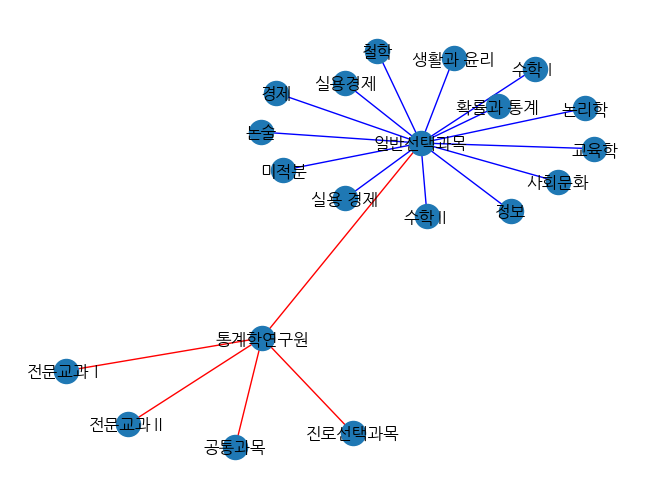

In [102]:
g = nx.Graph()
#pos=nx.spring_layout(g)
g.add_edges_from(job_subject_list, color='red', weight = 2)
g.add_edges_from(category_details_list, color = 'blue', weight=5)
g.edges(data=True)
edges = g.edges()
colors = [g[u][v]['color'] for u, v in edges]
nx.draw(g, with_labels=True, font_family = 'NanumGothic', edge_color=colors)
#nx.draw_networkx_edges(g, pos)
#g.degree()

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Graph_Viz():

    def __init__(self, job):
        try:
            self.job not in df['job']
        except:
            print('해당 직업이 데이터베이스에 없습니다.')
        self.job = job
    

    def set_edge_list(self, df):
        
        
        #직업과 과목을 연결하는 리스트 생성
        #직업과 과목 엣지 리스트: job_subject_edge_list
        subject_category_list = list(df[df.job == self.job]['subject_category'])
        subject_category_node_list = list(set(subject_category_list))
        job_subject_edge_list = []
        if len(subject_category_node_list) != 0:
            for subject in subject_category_node_list:
                job_subject_edge_list.append((self.job, subject))
        
        #데이터 프레임의 subject_details에서 ':'를 ','로 변경하여 '수학교과:'같은 노이즈 데이터를 필터링하기 위함
        df['subject_details'] = df['subject_details'].apply(lambda x: x.replace(':', ','))
        
        #과목 유형의 리스트 생성
        category_details_edge_list = []
        category_details_node_list = []
        for category in subject_category_node_list:
            details_list = list(df[(df.job == self.job) & (df.subject_category == category)]['subject_details'])
            
            #과목 유형을 첫번째 원소로 하는 리스트 생성
            tmp_list = []
            details_subject_list = [category] 
            
            #string_type으로 되어 있는 세부과목들을 ','로 구분하여 details_subject_list에 추가
            for a in details_list:
                l = a.split(',')
                tmp_list.extend(l)
            
            #'~교과'로 되어 있는 노이즈 데이터 제거
            for e in tmp_list:
                if '교과' in e:
                    tmp_list.remove(e)
            tmp_list = [i.strip() for i in tmp_list]
            
            
            #'수학II'가 아니라 그냥 'II'라고 되어 있는 과목명을 바로 직전의 과목명을 참고하여 '수학II'로 변경
            for e in tmp_list:
                if len(e) == 1:
                    i = tmp_list.index(e)
                    tmp_list[i]=tmp_list[i-1][:-1]+e
            
            category_details_node_list.extend(tmp_list)
            details_subject_list.extend(tmp_list)
            
            #과목 유형과 세부과목을 연결한 리스트 생성
            #과목 유형과 세부과목 엣지 리스트: category_details_edge_list
            
            category_details_list = []
            if len(details_subject_list) != 0:
                for detail in details_subject_list[1:]:
                    category_details_list.append((details_subject_list[0], detail))
                category_details_edge_list.append(category_details_list)
        
        category_details_node_list = list(set(category_details_node_list))
        return subject_category_node_list, job_subject_edge_list, category_details_node_list, category_details_edge_list
    
    def draw_graph(self, subject_category_node_list, job_subject_edge_list, category_details_node_list, category_details_edge_list, graph_size = 15):
        plt.figure(figsize = (graph_size, graph_size))
        g = nx.Graph()
        g.add_node(self.job, kind = '직업', color = 'silver')
        g.add_nodes_from(subject_category_node_list, kind = '교과 유형', color = 'sandybrown')
        g.add_nodes_from(category_details_node_list, kind = '세부교과', color = 'lightskyblue')
        g.add_edges_from(job_subject_edge_list, color='silver', weight = 2, length = 10)
        for n in category_details_edge_list:
            g.add_edges_from(n, color = 'sandybrown', weight=2, length = 10)
        node_colors = nx.get_node_attributes(g, 'color').values()
        edge_colors = nx.get_edge_attributes(g, 'color').values()
        node_sizes = dict(g.degree)
        pos = nx.spring_layout(g)
        nx.draw(g,
        pos = pos,
        with_labels=True,
        font_family = 'NanumGothic', 
        edge_color=edge_colors, 
        node_color = node_colors, 
        node_size = [v * 100 for v in node_sizes.values()])
        plt.plot()

해당 직업이 데이터베이스에 없습니다.


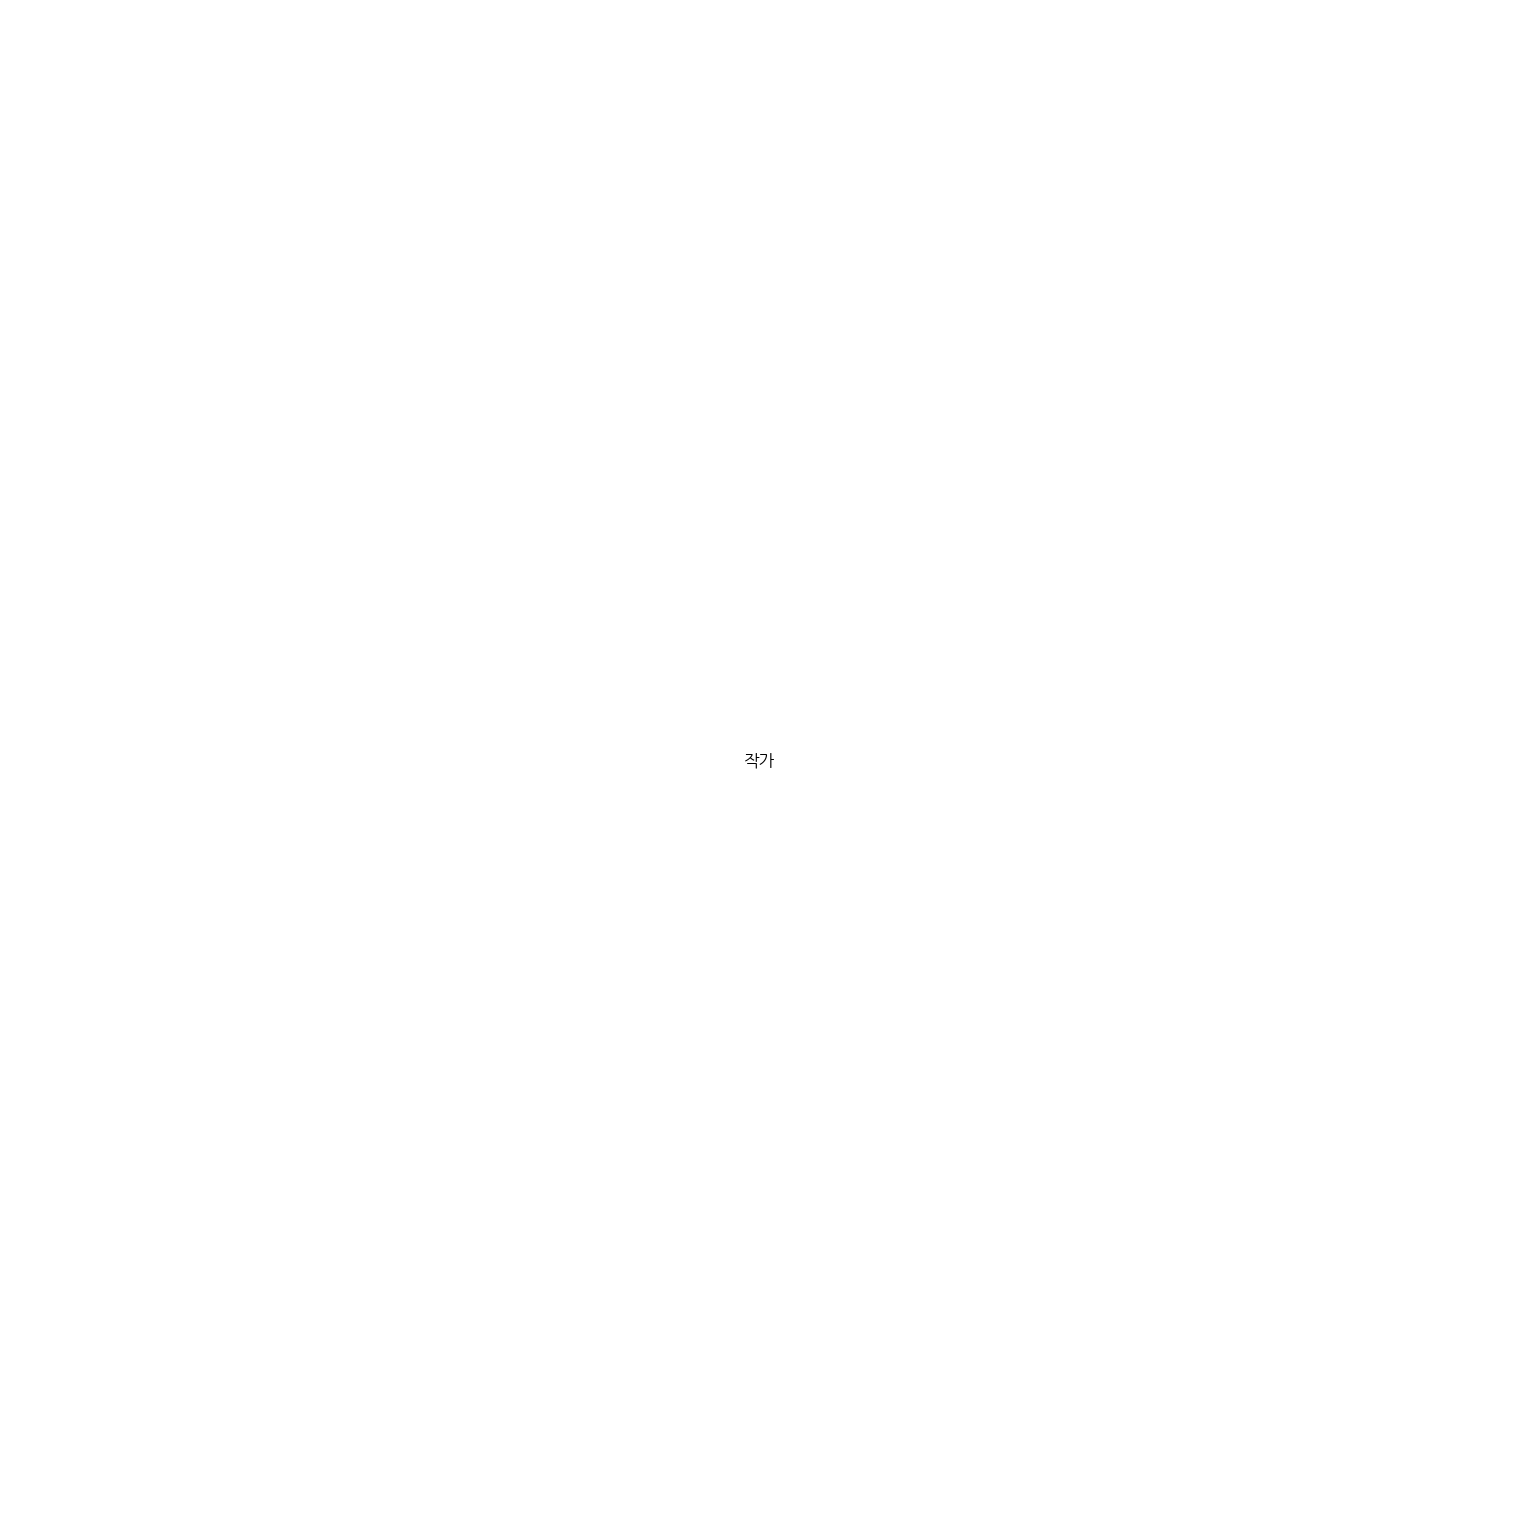

In [272]:
g = Graph_Viz('작가')
a, b, c, d = g.set_edge_list(job_major_subject_df)
g.draw_graph(a, b, c, d)

In [224]:
g = Graph_Viz('통계학연구원')
a, b, c, d = g.set_edge_list(job_major_subject_df)


g = nx.Graph()
#pos=nx.spring_layout(g)
g.add_nodes_from(a, kind = '교과 유형', color = 'red')
g.add_nodes_from(c, kind = '세부교과', color = 'blue')
g.add_edges_from(b, color='red', weight = 2)
nodes = g.nodes()
print(nodes)
print(g.nodes(data=True))
print()
edges = g.edges()
print(edges)
print(g.edges(data=True))

['진로선택과목', '전문교과Ⅰ', '공통과목', '일반선택과목', '전문교과Ⅱ', '논술', '사회 탐구 방법 및 사회과제 연구', '교육학', '기술가정', '심화수학Ⅰ', '실용경제', '물리학Ⅱ', '생활과 윤리', '지역 이해', '실용 경제', '보험 일반', '사회', '실용 수학', '실용수학', '사회문제 탐구', '수학Ⅰ', '세계 문제와 미래 사회', '수학 과제 탐구', '미적분', '확률과 통계', '수학과제탐구', '경제 수학', '국제법', '국제 경제', '경제', '생활ㆍ교양', '예산ㆍ자금', '논리학', '금융 일반', '수학Ⅱ', '심화 수학Ⅰ', '기하', '정보과학', '사회문화', '경제수학', '국제 관계와 국제기구', '과학', '수학', '기업 자원 통합 관리', '심화수학Ⅱ', '고급수학Ⅱ', '철학', '정보', '고급수학Ⅰ', '정보처리와 관리', '통계학연구원']
[('진로선택과목', {'kind': '교과 유형', 'color': 'red'}), ('전문교과Ⅰ', {'kind': '교과 유형', 'color': 'red'}), ('공통과목', {'kind': '교과 유형', 'color': 'red'}), ('일반선택과목', {'kind': '교과 유형', 'color': 'red'}), ('전문교과Ⅱ', {'kind': '교과 유형', 'color': 'red'}), ('논술', {'kind': '세부교과', 'color': 'blue'}), ('사회 탐구 방법 및 사회과제 연구', {'kind': '세부교과', 'color': 'blue'}), ('교육학', {'kind': '세부교과', 'color': 'blue'}), ('기술가정', {'kind': '세부교과', 'color': 'blue'}), ('심화수학Ⅰ', {'kind': '세부교과', 'color': 'blue'}), ('실용경제', {'kind': '세부교과', 'color': 'blue'}), ('물리학Ⅱ', {'kind': '세부교과

[]

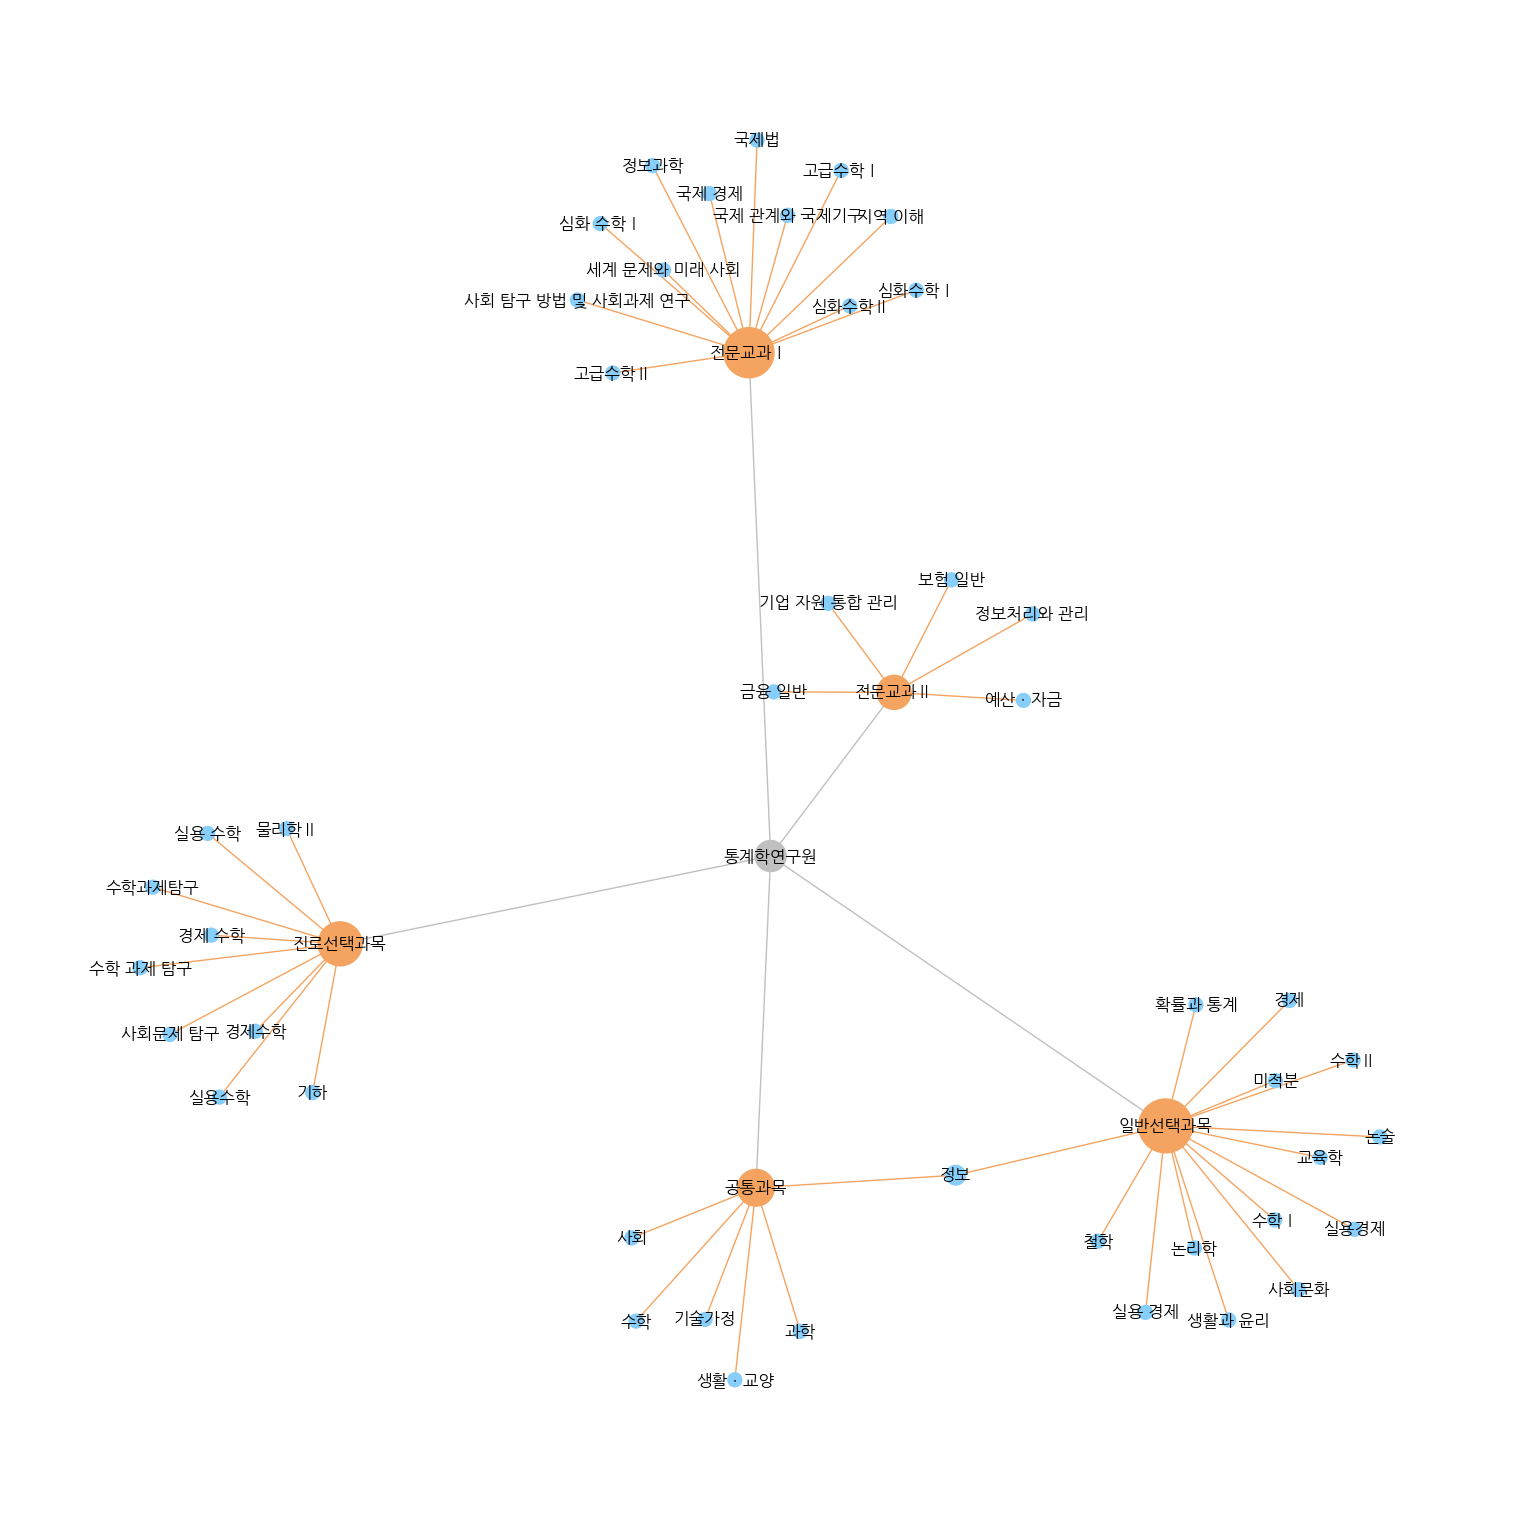

In [265]:
g = Graph_Viz('통계학연구원')
a, b, c, d = g.set_edge_list(job_major_subject_df)

plt.figure(figsize=(15,15)) 
g = nx.Graph()
#pos=nx.spring_layout(g)
g.add_node('통계학연구원', kind = '직업', color = 'silver')
g.add_nodes_from(a, kind = '교과 유형', color = 'sandybrown')
g.add_nodes_from(c, kind = '세부교과', color = 'lightskyblue')
g.add_edges_from(b, color='silver', weight = 2, length = 10)
for n in d:
    g.add_edges_from(n, color = 'sandybrown', weight=2, length = 10)
g.edges(data=True)
edges = g.edges()
nodes = g.nodes()
node_colors = nx.get_node_attributes(g, 'color').values()
edge_colors = nx.get_edge_attributes(g, 'color').values()
node_sizes = dict(g.degree)
#edge_colors = [g[u][v]['color'] for u, v in edges]
pos = nx.spring_layout(g)
nx.draw(g,
pos = pos, 
with_labels=True, 
font_family = 'NanumGothic', edge_color=edge_colors, node_color = node_colors, node_size = [v * 100 for v in node_sizes.values()])
#nx.draw_networkx_edges(g, pos)
#g.degree()
g.nodes()
plt.plot()

In [161]:
b

[[('진로선택과목', '실용 수학'),
  ('진로선택과목', '기하'),
  ('진로선택과목', '경제 수학'),
  ('진로선택과목', '수학 과제 탐구'),
  ('진로선택과목', '사회문제 탐구'),
  ('진로선택과목', '실용수학'),
  ('진로선택과목', '기하'),
  ('진로선택과목', '경제수학'),
  ('진로선택과목', '수학과제탐구'),
  ('진로선택과목', '물리학Ⅱ')],
 [('전문교과Ⅰ', '심화 수학Ⅰ'),
  ('전문교과Ⅰ', '정보과학'),
  ('전문교과Ⅰ', '국제 경제'),
  ('전문교과Ⅰ', '국제법'),
  ('전문교과Ⅰ', '지역 이해'),
  ('전문교과Ⅰ', '세계 문제와 미래 사회'),
  ('전문교과Ⅰ', '국제 관계와 국제기구'),
  ('전문교과Ⅰ', '사회 탐구 방법 및 사회과제 연구'),
  ('전문교과Ⅰ', '심화수학Ⅰ'),
  ('전문교과Ⅰ', '심화수학Ⅱ'),
  ('전문교과Ⅰ', '고급수학Ⅰ'),
  ('전문교과Ⅰ', '고급수학Ⅱ'),
  ('전문교과Ⅰ', '정보과학')],
 [('공통과목', '수학'),
  ('공통과목', '사회'),
  ('공통과목', '기술가정'),
  ('공통과목', '생활ㆍ교양'),
  ('공통과목', '수학'),
  ('공통과목', '사회'),
  ('공통과목', '정보'),
  ('공통과목', '과학')],
 [('일반선택과목', '수학Ⅰ'),
  ('일반선택과목', '수학Ⅱ'),
  ('일반선택과목', '미적분'),
  ('일반선택과목', '확률과 통계'),
  ('일반선택과목', '경제'),
  ('일반선택과목', '사회문화'),
  ('일반선택과목', '생활과 윤리'),
  ('일반선택과목', '정보'),
  ('일반선택과목', '실용 경제'),
  ('일반선택과목', '수학Ⅰ'),
  ('일반선택과목', '수학Ⅱ'),
  ('일반선택과목', '미적분'),
  ('일반선택과목', '확률과 통계'),
  ('일반선택과목', '사회문화'),
  ('일반선

In [182]:
job_major_subject_df['subject_details'] = job_major_subject_df['subject_details'].apply(lambda x: x.replace(':', ','))
details_list = list(job_major_subject_df[(job_major_subject_df.job == '통계학연구원') & (job_major_subject_df.subject_category =='일반선택과목')]['subject_details'])
details_list
subject_list = []
subject_list_2 = ['일반선택과목']
a_list = []
for a in details_list:
    l = a.split(',')
    subject_list.extend(l)
'''
for e in subject_list:
    if '교과' in e:
        subject_list.remove(e)
''' 
subject_list = [i.strip() for i in subject_list]
subject_list_2.extend(subject_list)
for e in subject_list_2:
    if len(e) == 1:
        i = subject_list_2.index(e)
        subject_list_2[i]=subject_list_2[i-1][:-1]+e
        
subject_list

category_details_list = []
if len(subject_list_2) != 0:
    for detail in subject_list_2[1:]:
        category_details_list.append((subject_list_2[0], detail))
category_details_list
subject_list_2 = subject_list
subject_list_2

['수학교과',
 '수학Ⅰ',
 'Ⅱ',
 '미적분',
 '확률과 통계',
 '사회교과',
 '경제',
 '사회문화',
 '생활과 윤리',
 '기술ㆍ가정교과',
 '정보',
 '생활ㆍ교양교과',
 '실용 경제',
 '수학교과',
 '수학Ⅰ',
 '수학Ⅱ',
 '미적분',
 '확률과 통계',
 '사회교과',
 '사회문화',
 '경제',
 '생활과 윤리',
 '생활ㆍ교양교과',
 '정보',
 '논리학',
 '철학',
 '논술',
 '실용경제',
 '교육학']

In [190]:
subject_list_1 = list(set(subject_list_1))
subject_list_2 = list(set(subject_list_2))
print(subject_list_1)
print(subject_list_2)
for a in subject_list_1:
  for b in subject_list_2:
    if a[:1] in b and '교과' in b:
      print(b)

['기술가정', '과학', '생활ㆍ교양', '수학', '사회', '정보']
['논술', '교육학', '실용경제', '수학교과', '생활과 윤리', '실용 경제', '생활ㆍ교양교과', '수학Ⅰ', '미적분', '확률과 통계', '경제', '사회교과', '논리학', '수학Ⅱ', '사회문화', 'Ⅱ', '기술ㆍ가정교과', '철학', '정보']
기술ㆍ가정교과
수학교과
생활ㆍ교양교과
사회교과
기술ㆍ가정교과
생활ㆍ교양교과
수학교과
사회교과
기술ㆍ가정교과


In [ ]:
for a in details_list:
    if '교과' in 

In [110]:
category_details_list = list(set(subject_category_list))
category_list = ['category_'+ str(x+1) for x in range(len(category_details_list))]
category_list
for a in category_list:
    a = []

In [111]:
category_1

NameError: name 'category_1' is not defined

In [35]:
G = nx.MultiGraph()

family = [('G','F'),('D','E')]
friend = [('A','B'),('C','F'),('C','E'),('E','J')]
coworker = [('B','C'),('C','F'),('I','J'),('E','H'),('G','F'),('E','I')]
neighbor = [('E','I'),('A','B')]

G.add_edges_from(family,relation='family')
G.add_edges_from(friend,relation='friend')
G.add_edges_from(coworker,relation='coworker')
G.add_edges_from(neighbor,relation='neighbor')
G.nodes()

NodeView(('G', 'F', 'D', 'E', 'A', 'B', 'C', 'J', 'I', 'H'))